In [136]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
from keras.models import Model, load_model
from tensorflow.keras.layers import Input, Average




In [137]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [138]:
model1 = load_model('CNN.Model')
model2 = load_model('TransferLearning.Model')
model3 = load_model('Resnet50.Model')

In [139]:
BATCH_SIZE = 8
IMAGE_SIZE = 256
CHANNELS = 3
EPOCHS = 10

In [140]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 20638 files belonging to 15 classes.


In [141]:
class_names = dataset.class_names
class_names

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [142]:
train_size = 0.8
len(dataset)*train_size

2064.0

In [143]:
train_ds = dataset.take(54)
len(train_ds)

54

In [144]:
test_ds = dataset.skip(54)
len(test_ds)

2526

In [145]:
val_size = 0.1
len(dataset)*val_size

258.0

In [146]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [147]:
val_ds = test_ds.skip(6)
len(val_ds)

2520

In [148]:
from keras.models import Model, load_model
from keras.layers import Input, Average

# Modelleri yükle
model1 = load_model('CNN.Model')
model2 = load_model('TransferLearning.Model')
model3 = load_model('Resnet50.Model')

# Her model için benzersiz isimler atayın
model1._name = 'model_cnn'
model2._name = 'model_transfer_learning'
model3._name = 'model_resnet50'

# Modeller listesi
models = [model1, model2, model3]

# Ensemble için girdi katmanı
model_input = Input(shape=(256, 256, 3))

# Her modelin çıktılarını al ve ortalama alarak birleştir
model_outputs = [model(model_input) for model in models]
ensemble_output = Average()(model_outputs)

# Ensemble modeli oluştur
ensemble_model = Model(inputs=model_input, outputs=ensemble_output, name='ensemble')



In [149]:
ensemble_model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                  metrics=['accuracy'])

In [150]:
history = ensemble_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
)

Epoch 1/10
54/54 [==============================] - 479s 9s/step - loss: 0.5022 - accuracy: 0.9745 - val_loss: 1.4555 - val_accuracy: 0.9000
Epoch 2/10
54/54 [==============================] - 468s 9s/step - loss: 0.5605 - accuracy: 0.9468 - val_loss: 3.1265 - val_accuracy: 0.9448
Epoch 3/10
54/54 [==============================] - 469s 9s/step - loss: 0.4375 - accuracy: 0.9884 - val_loss: 8.0712 - val_accuracy: 0.9156
Epoch 4/10
54/54 [==============================] - 469s 9s/step - loss: 0.4786 - accuracy: 0.9931 - val_loss: 0.6545 - val_accuracy: 0.9700
Epoch 5/10
54/54 [==============================] - 468s 9s/step - loss: 0.3774 - accuracy: 0.9977 - val_loss: 0.5759 - val_accuracy: 0.9679
Epoch 6/10
54/54 [==============================] - 466s 9s/step - loss: 0.3315 - accuracy: 1.0000 - val_loss: 0.5435 - val_accuracy: 0.9745
Epoch 7/10
54/54 [==============================] - 466s 9s/step - loss: 0.3019 - accuracy: 0.9977 - val_loss: 0.4281 - val_accuracy: 0.9802
Epoch 8/10
54

In [151]:
scores = ensemble_model.evaluate(test_ds)

2526/2526 [==============================] - 456s 180ms/step - loss: 0.3799 - accuracy: 0.9814


In [152]:
tf.keras.models.save_model(ensemble_model, "EnsembleLearning.Model")

INFO:tensorflow:Assets written to: EnsembleLearning.Model\assets


C:\Users\tunce\anaconda3\envs\Gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [153]:
scores

[0.3799304962158203, 0.9814411401748657]

In [154]:
history

In [155]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 54}

In [156]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [157]:
history.history['loss'][:5]

[0.5021958351135254,
 0.5604692697525024,
 0.4374794065952301,
 0.47861427068710327,
 0.37742558121681213]

In [158]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

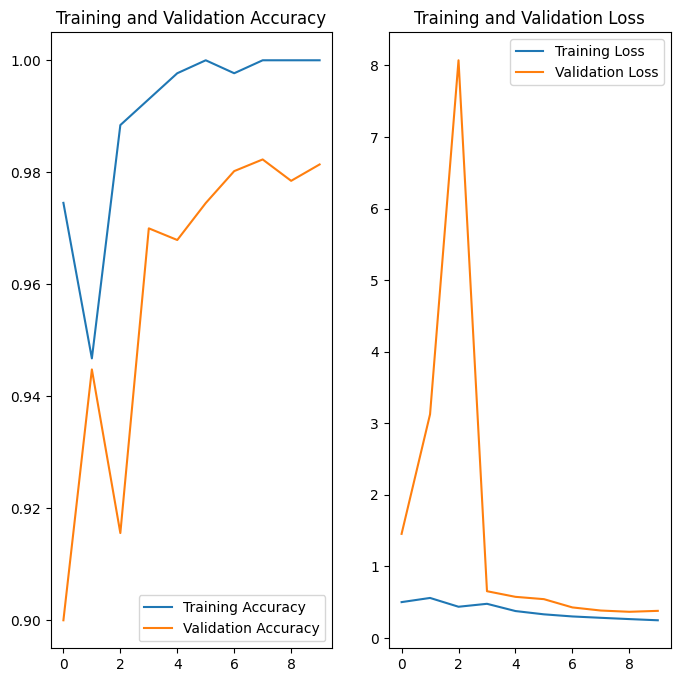

In [159]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Tomato_Septoria_leaf_spot
predicted label: Tomato_Septoria_leaf_spot


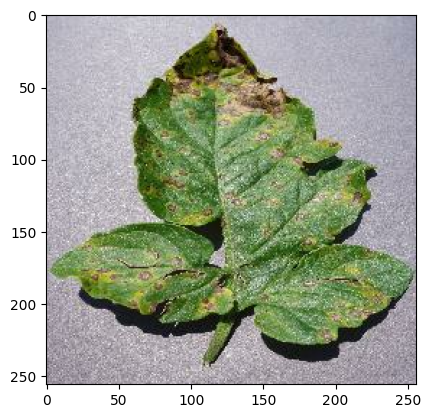

In [160]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = ensemble_model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [161]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

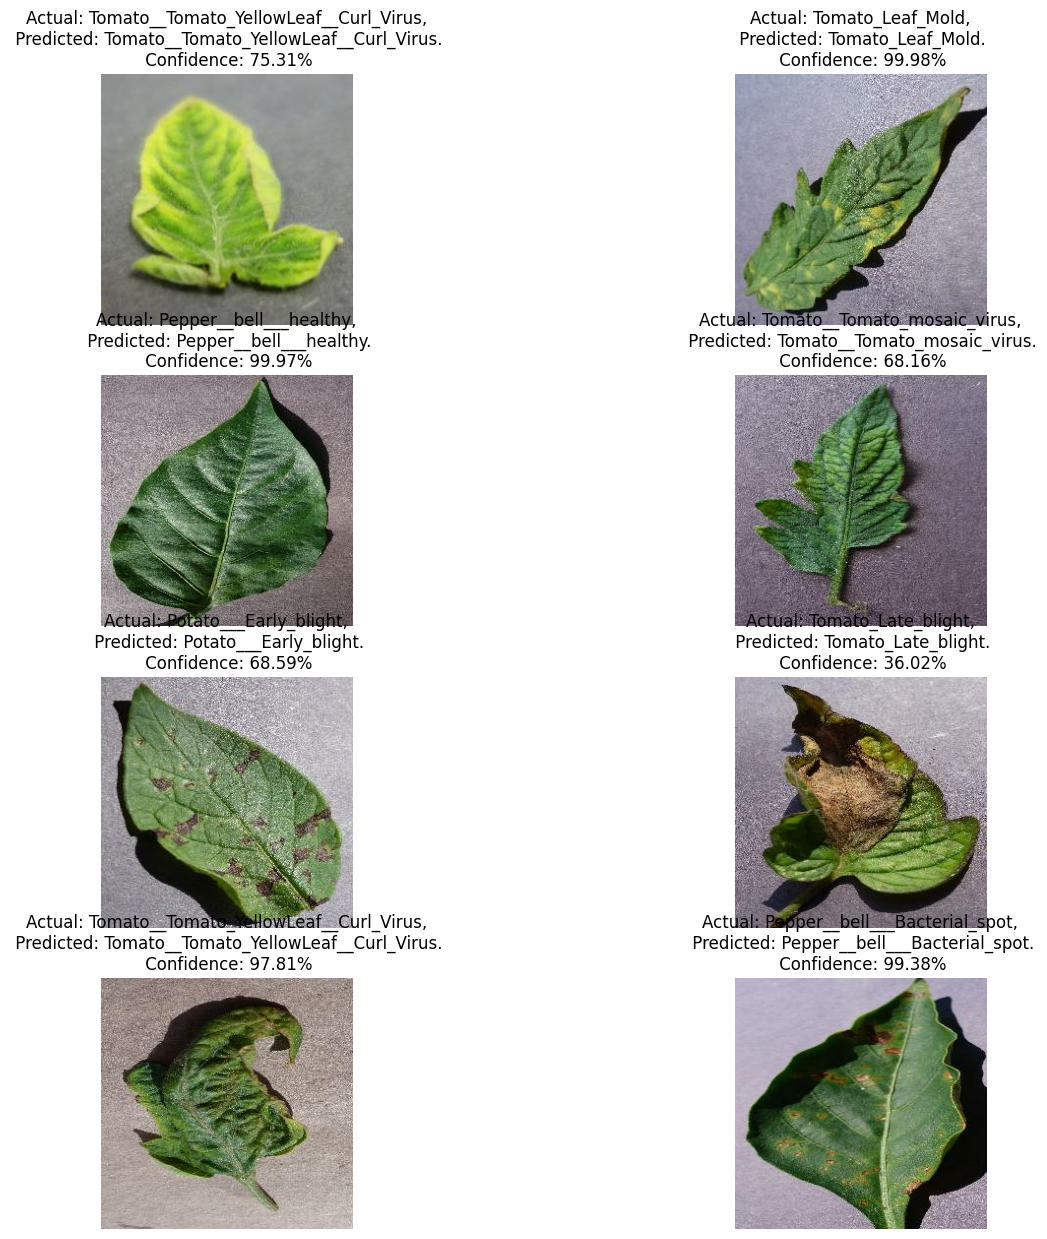

In [162]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(8):
        ax = plt.subplot(4, 2, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(ensemble_model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")